In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
RANDOM_STATE = 42
from datetime import date

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
###Products

In [3]:
df_products = pd.read_csv('definitivo_10000clientes.csv')

In [4]:
df_products.head().T

,0,1,2,3,4
pk_cid,"1,374,819.00","1,392,320.00","1,377,496.00","1,374,123.00","1,374,403.00"
recency,505.00,408.00,492.00,508.00,506.00
ingesta,485.00,395.00,485.00,485.00,485.00
frequency,17.00,14.00,17.00,17.00,17.00
monetary_value,"4,290.00","3,190.00","2,880.00","2,850.00","2,840.00"
r_quartile,4.00,4.00,4.00,4.00,4.00
f_quartile,1.00,1.00,1.00,1.00,1.00
m_quartile,1.00,1.00,1.00,1.00,1.00
i_quartile,1.00,1.00,1.00,1.00,1.00
RFMScore,411.00,411.00,411.00,411.00,411.00


In [5]:
df_products.describe()

,pk_cid,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore,region_code,salary,age,gender,unidades_vendidas_total,em_acount,debit_card
count,"11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00","11,905.00"
mean,"1,363,176.19",410.54,390.57,13.84,649.63,4.00,1.00,1.00,1.19,411.00,26.36,"115,072.91",41.14,1.55,1.86,0.68,0.38
std,"155,570.25",61.98,61.35,2.03,396.36,0.00,0.00,0.00,0.39,0.00,13.00,"101,230.66",13.85,0.50,0.96,0.46,0.48
min,"17,980.00",303.00,304.00,11.00,170.00,4.00,1.00,1.00,1.00,411.00,1.00,"12,048.51",4.50,0.00,0.00,0.00,0.00
25%,"1,381,346.00",358.00,334.00,12.00,310.00,4.00,1.00,1.00,1.00,411.00,15.00,"67,621.80",31.00,1.00,1.00,0.00,0.00
50%,"1,390,425.00",414.00,395.00,14.00,590.00,4.00,1.00,1.00,1.00,411.00,28.00,"105,227.43",38.00,2.00,2.00,1.00,0.00
75%,"1,399,868.00",466.00,454.00,16.00,850.00,4.00,1.00,1.00,1.00,411.00,35.00,"124,439.19",48.00,2.00,2.00,1.00,1.00
max,"1,421,215.00",510.00,485.00,17.00,"4,290.00",4.00,1.00,1.00,2.00,411.00,52.00,"3,045,715.68",101.00,2.00,8.00,1.00,1.00


In [6]:
df_products['salary'].fillna(value='nada', inplace=True)

In [7]:
df_products = df_products[df_products['salary'] != 'nada']

C:\Users\evive\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
df_products['region_code'].fillna(value='nada', inplace=True)

In [9]:
df_products = df_products[df_products['region_code'] != 'nada']

In [10]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11905 entries, 0 to 11904
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pk_cid                   11905 non-null  int64  
 1   recency                  11905 non-null  int64  
 2   ingesta                  11905 non-null  int64  
 3   frequency                11905 non-null  int64  
 4   monetary_value           11905 non-null  float64
 5   r_quartile               11905 non-null  int64  
 6   f_quartile               11905 non-null  int64  
 7   m_quartile               11905 non-null  int64  
 8   i_quartile               11905 non-null  int64  
 9   RFMScore                 11905 non-null  int64  
 10  region_code              11905 non-null  float64
 11  salary                   11905 non-null  float64
 12  age                      11905 non-null  float64
 13  gender                   11905 non-null  float64
 14  unidades_vendidas_tota

In [11]:
df_products['salary'] = df_products['salary'].astype(int)

In [12]:
df_products['region_code'] = df_products['region_code'].astype(int)

In [13]:
df_products['age'].describe()

count   11,905.00
mean        41.14
std         13.85
min          4.50
25%         31.00
50%         38.00
75%         48.00
max        101.00
Name: age, dtype: float64

In [14]:
reduce_df_products = ['region_code', 'salary', 'age']

In [15]:
reduce_df = df_products[reduce_df_products]

In [16]:
reduce_df.head(5).T

,0,1,2,3,4
region_code,28.00,28.00,28.00,28.00,28.00
salary,"121,839.00","107,353.00","101,396.00","113,652.00","90,748.00"
age,38.00,27.00,28.00,52.00,51.00


In [17]:
reduce_df.describe()

,region_code,salary,age
count,"11,905.00","11,905.00","11,905.00"
mean,26.36,"115,072.45",41.14
std,13.00,"101,230.66",13.85
min,1.00,"12,048.00",4.50
25%,15.00,"67,621.00",31.00
50%,28.00,"105,227.00",38.00
75%,35.00,"124,439.00",48.00
max,52.00,"3,045,715.00",101.00


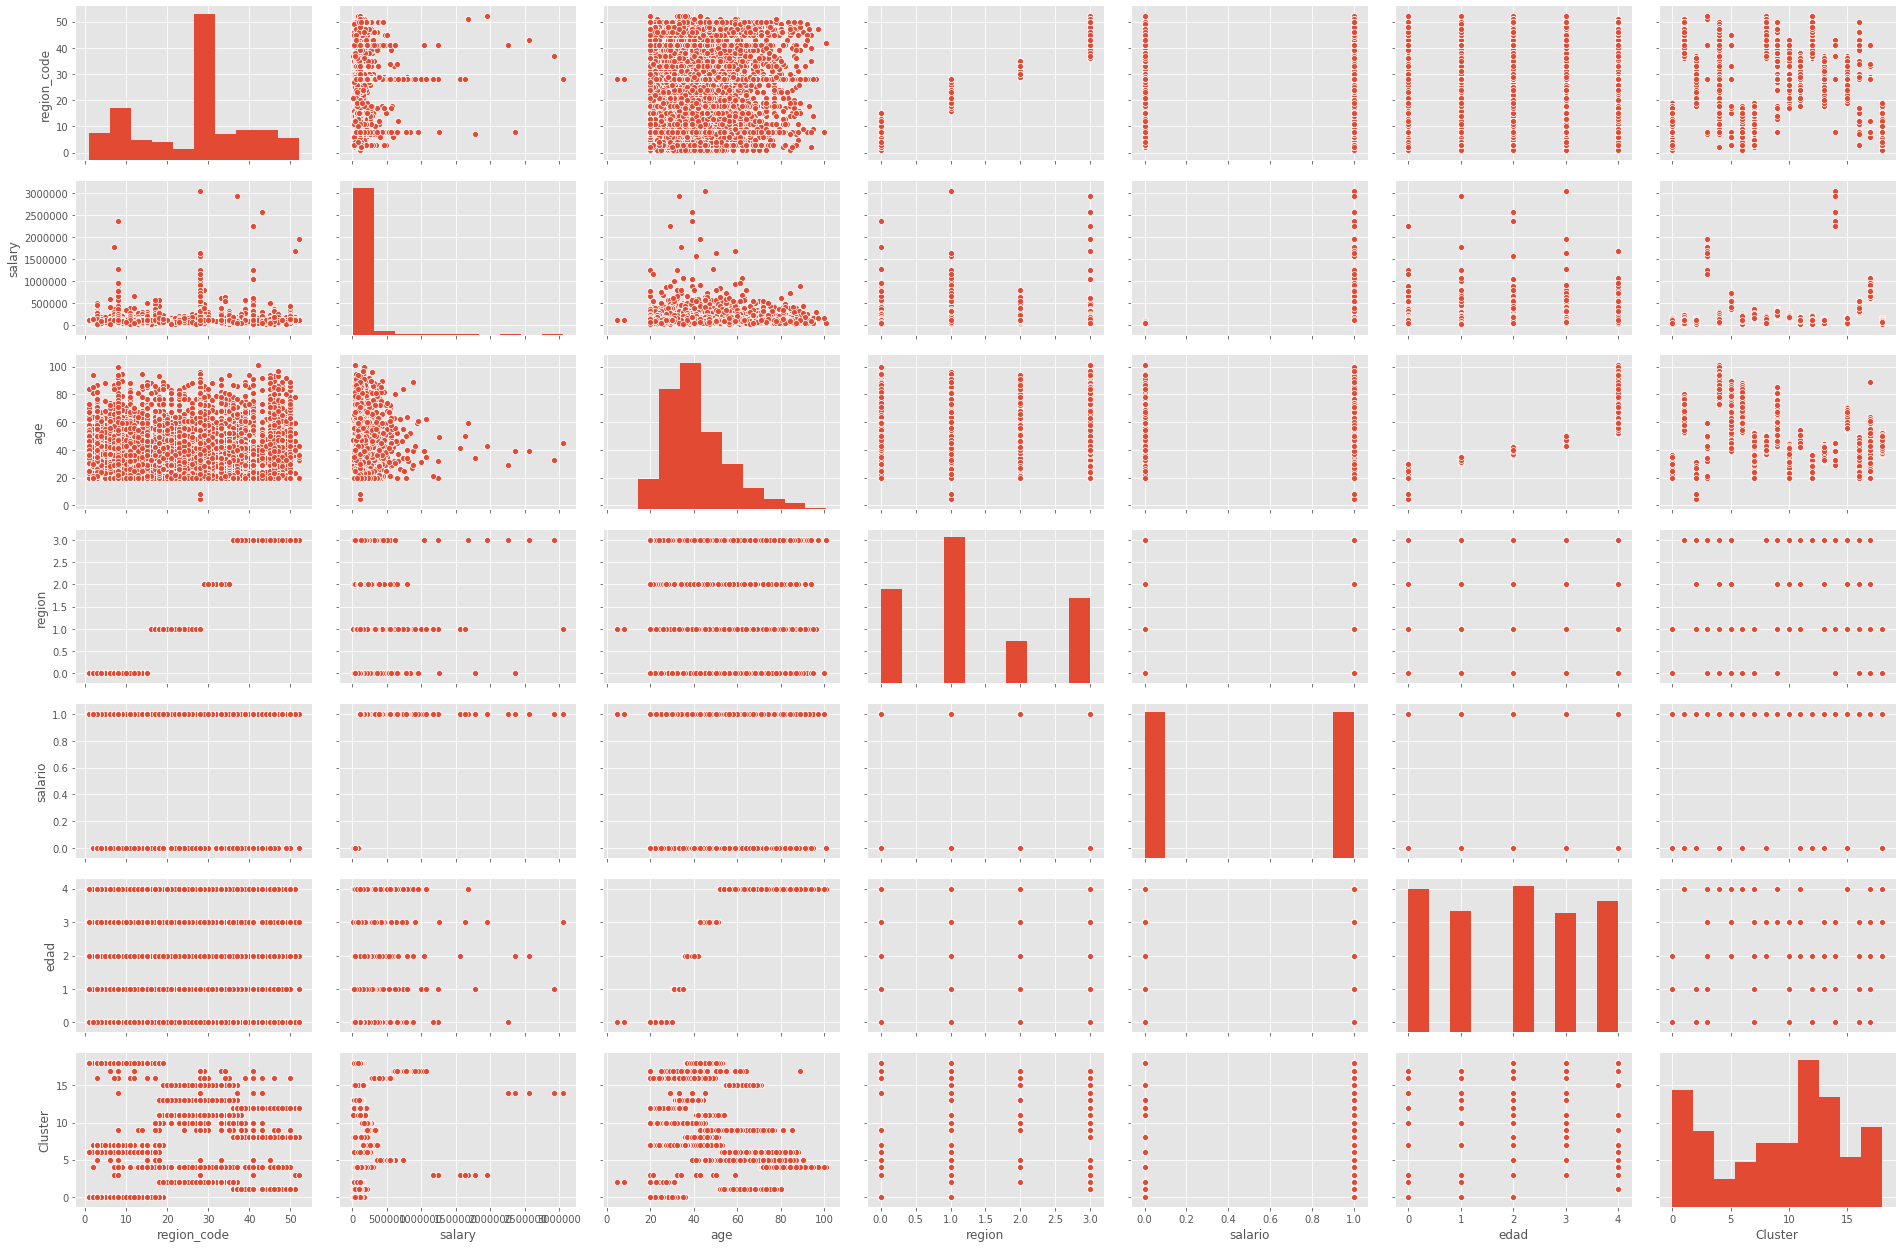

In [45]:
sns.pairplot(reduce_df, aspect=1.5)
plt.savefig("SMejores_0.png")

In [19]:
reduce_df['region'] = pd.qcut(reduce_df['region_code'], q=4, labels=range(4))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
reduce_df['salario'] = pd.qcut(reduce_df['salary'], q=2, labels=range(2))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
reduce_df['edad'] = pd.qcut(reduce_df['age'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
reduce_df.head(5).T

,0,1,2,3,4
region_code,28,28,28,28,28
salary,121839,107353,101396,113652,90748
age,38.00,27.00,28.00,52.00,51.00
region,1,1,1,1,1
salario,1,1,0,1,0
edad,2,0,0,4,3


In [23]:
reduce_df.pivot_table(index='salario', values=['region_code'], aggfunc=[len, np.median])


,len,median
,region_code,region_code
salario,,
0,5953,28
1,5952,28


In [24]:
reduce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11905 entries, 0 to 11904
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   region_code  11905 non-null  int32   
 1   salary       11905 non-null  int32   
 2   age          11905 non-null  float64 
 3   region       11905 non-null  category
 4   salario      11905 non-null  category
 5   edad         11905 non-null  category
dtypes: category(3), float64(1), int32(2)
memory usage: 634.3 KB


In [25]:
cruce_table = pd.crosstab(reduce_df['edad'], reduce_df['salario'])


In [26]:
cruce_table

salario,0,1
edad,,
0,1306,1281
1,1197,986
2,1423,1211
3,1026,1114
4,1001,1360


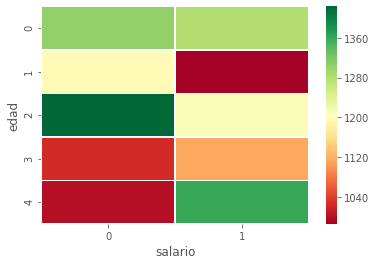

In [44]:
sns.heatmap(cruce_table, cmap='RdYlGn', linewidths=0.5)
plt.savefig("SMejores_1.png")

In [28]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=4))
        ]
)

In [29]:
pipe.fit(reduce_df[['salary', 'region_code', 'age']])

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [30]:
Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [31]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [32]:
reduce_df['Cluster'] = pipe.predict(reduce_df[['salary', 'region_code', 'age']])


C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
reduce_df['Cluster']

0        3
1        3
2        3
3        2
4        2
        ..
11900    0
11901    0
11902    0
11903    3
11904    0
Name: Cluster, Length: 11905, dtype: int32

In [34]:
reduce_df.groupby('Cluster').agg({
    'salary': 'mean',
    'region_code': 'median',
    'age': 'median'
})

,salary,region_code,age
Cluster,,,
0,"98,816.42",8,36.00
1,"708,139.49",28,42.00
2,"123,992.57",28,59.00
3,"106,269.38",29,35.00


In [35]:
from scipy.stats import scoreatpercentile

from statsmodels.compat.pandas import Substitution
from statsmodels.sandbox.nonparametric import kernels

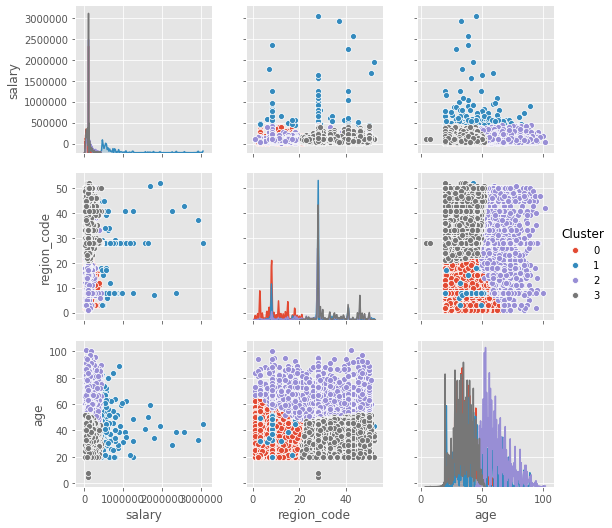

In [36]:

sns.pairplot(reduce_df, vars=['salary', 'region_code', 'age'], hue='Cluster', diag_kws={'bw': 0.2})
plt.savefig("SC10000_10.png")
plt.show()


C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

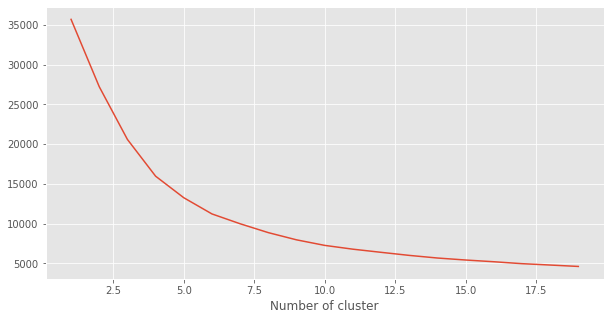

In [37]:
sse = {}
for k in range(1, 20):
    pipe = Pipeline(
            steps=[
                ('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=k))
            ]
        ).fit(reduce_df[['salary', 'region_code', 'age']])
    reduce_df['Cluster'] = pipe['KMeans'].labels_
    sse[k] = pipe['KMeans'].inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.savefig("SC10000_11.png")
plt.show()

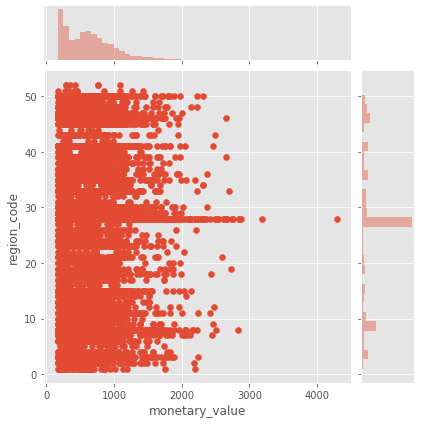

In [38]:

sns.jointplot(data=df_products, x="monetary_value", y="region_code")
plt.savefig("SC10000_12.png")

In [39]:
df2 = df_products[['region_code', 'salary', 'age', 'monetary_value', 'unidades_vendidas_total']]

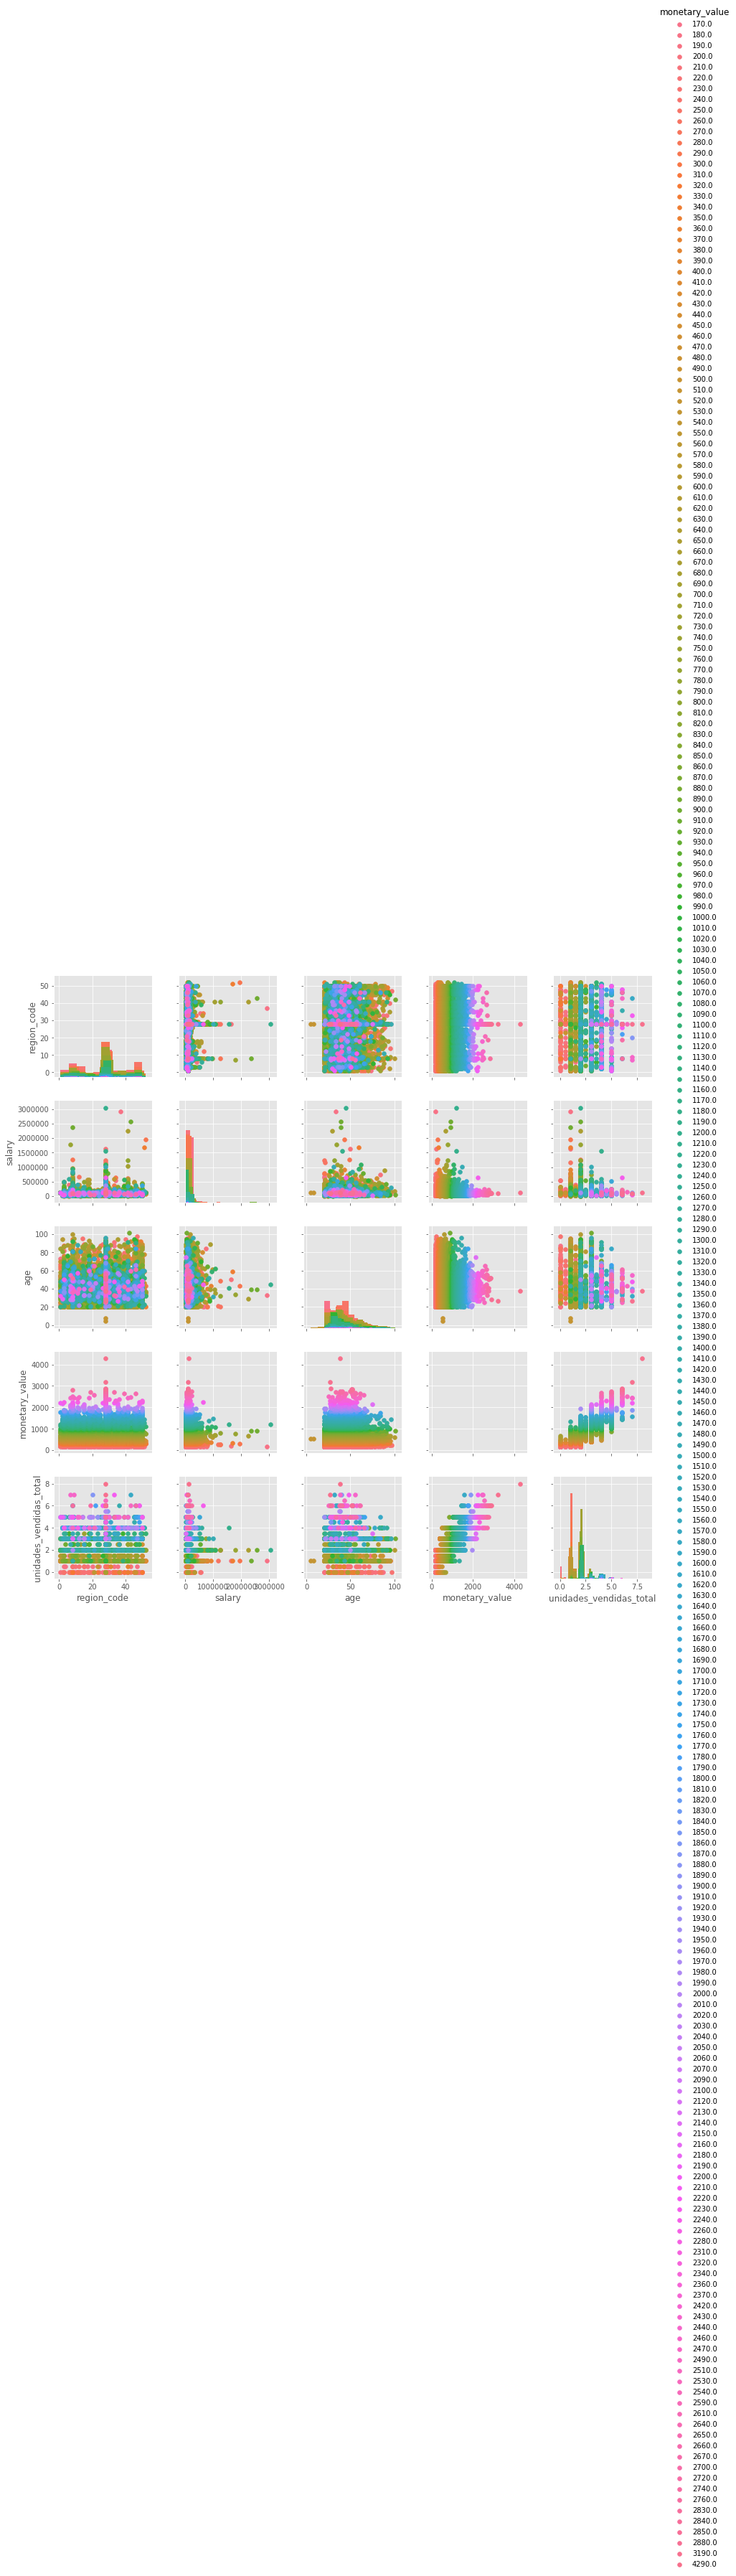

In [40]:
# PairGrid object with hue 
graph = sns.PairGrid(df2, hue ='monetary_value') 
# type of graph for diagonal 
graph = graph.map_diag(plt.hist) 
# type of graph for non-diagonal 
graph = graph.map_offdiag(plt.scatter) 
# to add legends 
graph = graph.add_legend() 
# to show 
graph.savefig("SC10000_13.png")
plt.show() 


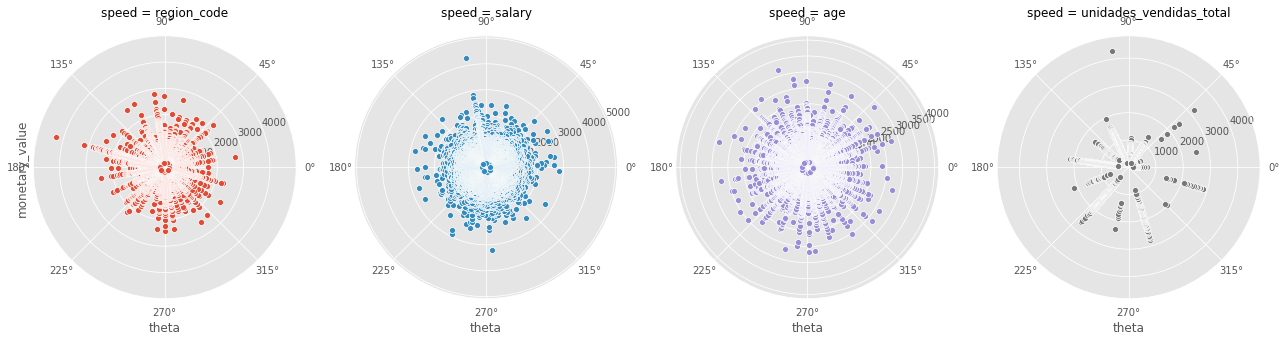

In [41]:

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'monetary_value': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df2, id_vars=['monetary_value'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "monetary_value")
g.savefig("SC10000_14.png")


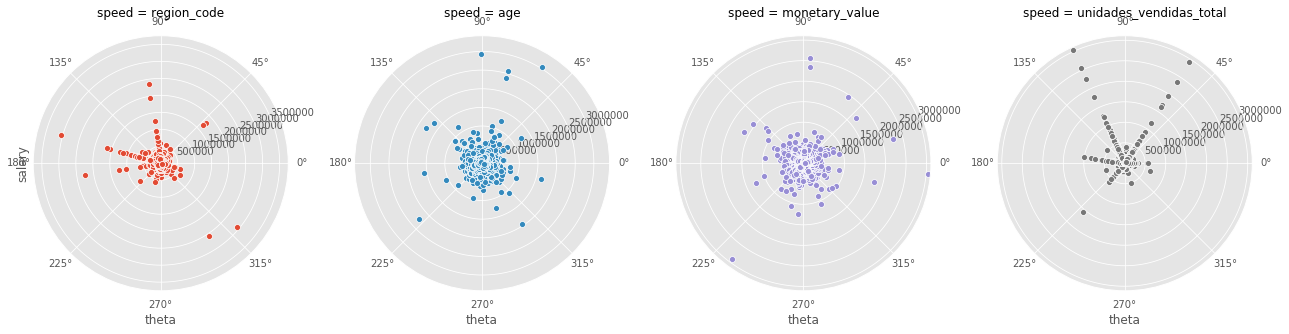

In [42]:

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'salary': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df2, id_vars=['salary'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "salary")
g.savefig("SC10000_15.png")


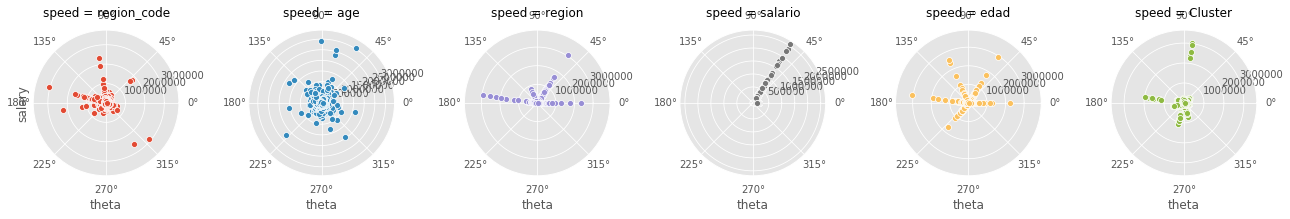

In [43]:
# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'salary': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(reduce_df, id_vars=['salary'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=3,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "salary")
g.savefig("SC10000_16.png")
